# Cryptocurrency Data Exploration

This notebook explores cryptocurrency data to understand its characteristics and patterns.

**Make your data module importable**

In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root))

# This allows:
# from src.data.data_loader import CryptoDataLoader
# This is the correct approach for notebooks

# %load_ext autoreload
# %autoreload 2

In [2]:
# Import necessary libraries
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Import our modules
from data.data_loader import CryptoDataLoader
from data.feature_engineering import FeatureEngineer
from utils.helpers import calculate_returns, calculate_volatility

## 1. Load Cryptocurrency Data

In [3]:
# Initialize data loader
loader = CryptoDataLoader('../data/raw')

# Define cryptocurrencies to analyze
tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'SOL-USD']

# Load data for the last 2 years
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=730)).strftime('%Y-%m-%d')

print(f"Loading data from {start_date} to {end_date}")

# Fetch data
crypto_data = loader.fetch_multiple_tickers(tickers, start_date, end_date)

print(f"Loaded data for {len(crypto_data)} cryptocurrencies")
for ticker, data in crypto_data.items():
    print(f"{ticker}: {len(data)} records from {data.index[0].date()} to {data.index[-1].date()}")

Loading data from 2024-01-15 to 2026-01-14


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Loaded data for 5 cryptocurrencies
BTC-USD: 730 records from 2024-01-15 to 2026-01-13
ETH-USD: 730 records from 2024-01-15 to 2026-01-13
BNB-USD: 730 records from 2024-01-15 to 2026-01-13
ADA-USD: 730 records from 2024-01-15 to 2026-01-13
SOL-USD: 730 records from 2024-01-15 to 2026-01-13


In [4]:
# Check data structure
print("Checking data structure...")
for ticker, data in crypto_data.items():
    print(f"\n{ticker}:")
    print(f"  Type: {type(data)}")
    print(f"  Shape: {data.shape}")
    print(f"  Columns: {list(data.columns)}")
    print(f"  Close column type: {type(data['Close'])}")
    print(f"  Close column shape: {data['Close'].shape}")
    
    # Fix if Close is a DataFrame
    if isinstance(data['Close'], pd.DataFrame):
        print(f"  Converting Close from DataFrame to Series...")
        data['Close'] = data['Close'].iloc[:, 0]
        crypto_data[ticker] = data  # Update the stored data

Checking data structure...

BTC-USD:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (730, 6)
  Columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']
  Close column type: <class 'pandas.core.series.Series'>
  Close column shape: (730,)

ETH-USD:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (730, 6)
  Columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']
  Close column type: <class 'pandas.core.series.Series'>
  Close column shape: (730,)

BNB-USD:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (730, 6)
  Columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']
  Close column type: <class 'pandas.core.series.Series'>
  Close column shape: (730,)

ADA-USD:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (730, 6)
  Columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']
  Close column type: <class 'pandas.core.series.Series'>
  Close column shape: (730,)

SOL-USD:
  Type: <class 'pandas.core.frame.DataFrame'>
  Shape: (730, 6)
  C

## 2. Basic Data Analysis

In [5]:
# Display basic statistics for Bitcoin
btc_data = crypto_data['BTC-USD']
print("Bitcoin Data Statistics:")
print(btc_data.describe())

# Check for missing values
print("\nMissing Values:")
print(btc_data.isnull().sum())

Bitcoin Data Statistics:
               Close           High            Low           Open  \
count     730.000000     730.000000     730.000000     730.000000   
mean    84670.140946   86068.625642   83085.606641   84596.368504   
std     21599.350247   21799.568251   21434.526345   21654.125200   
min     39507.367188   40127.351562   38521.894531   39518.714844   
25%     65150.814453   66461.013672   63502.572266   65105.539062   
50%     87485.308594   89246.292969   85934.843750   87432.277344   
75%    103734.283203  105407.968750  101503.539062  103729.076172   
max    124752.531250  126198.070312  123196.046875  124752.140625   

             Volume  
count  7.300000e+02  
mean   4.528864e+10  
std    2.426580e+10  
min    9.344044e+09  
25%    2.763705e+10  
50%    4.077170e+10  
75%    5.781489e+10  
max    1.817464e+11  

Missing Values:
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64


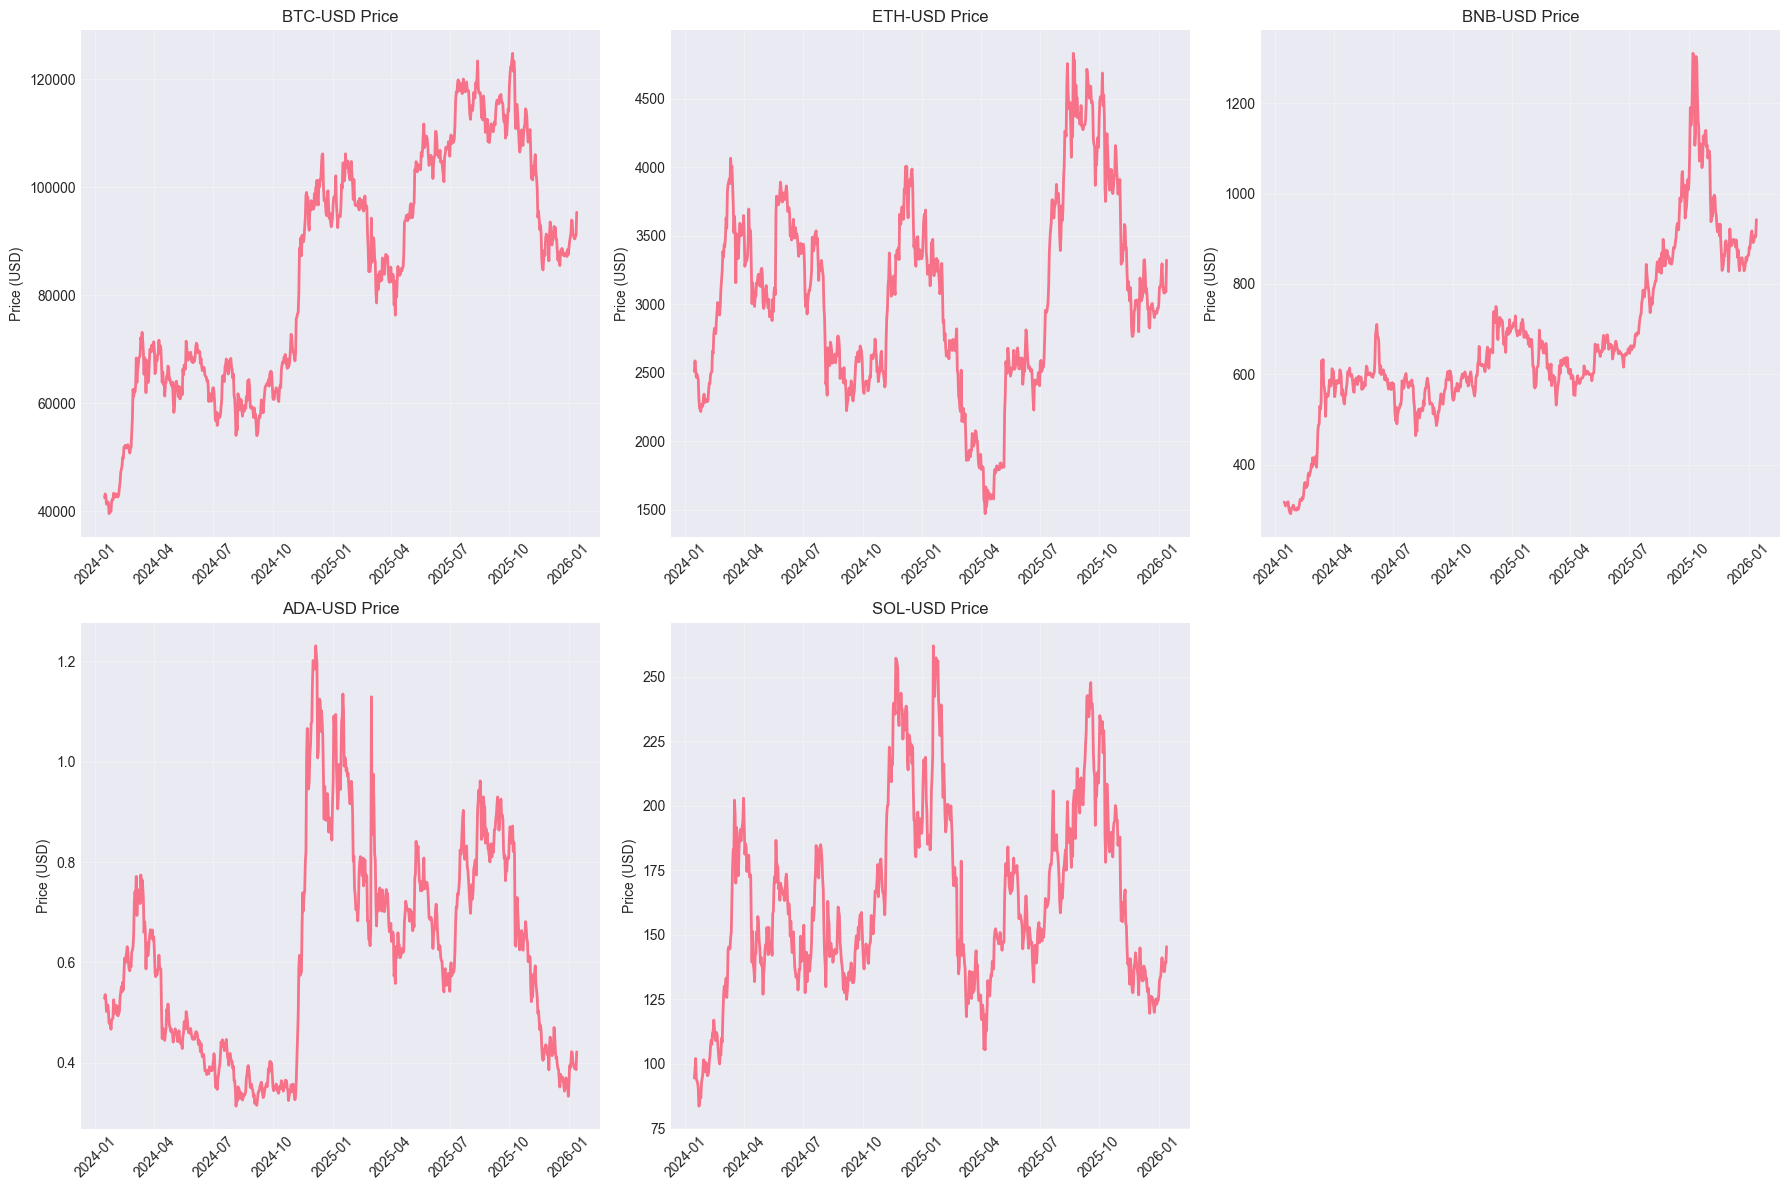

In [6]:
# Plot price trends for all cryptocurrencies
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (ticker, data) in enumerate(crypto_data.items()):
    if i < len(axes):
        axes[i].plot(data.index, data['Close'], linewidth=2)
        axes[i].set_title(f'{ticker} Price')
        axes[i].set_ylabel('Price (USD)')
        axes[i].grid(True, alpha=0.3)
        
        # Format x-axis
        axes[i].tick_params(axis='x', rotation=45)

# Hide the last subplot if we have fewer than 6 cryptocurrencies
if len(crypto_data) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Price Analysis

BTC-USD: Close prices shape: (730,), Returns shape: (729,)
ETH-USD: Close prices shape: (730,), Returns shape: (729,)
BNB-USD: Close prices shape: (730,), Returns shape: (729,)
ADA-USD: Close prices shape: (730,), Returns shape: (729,)
SOL-USD: Close prices shape: (730,), Returns shape: (729,)


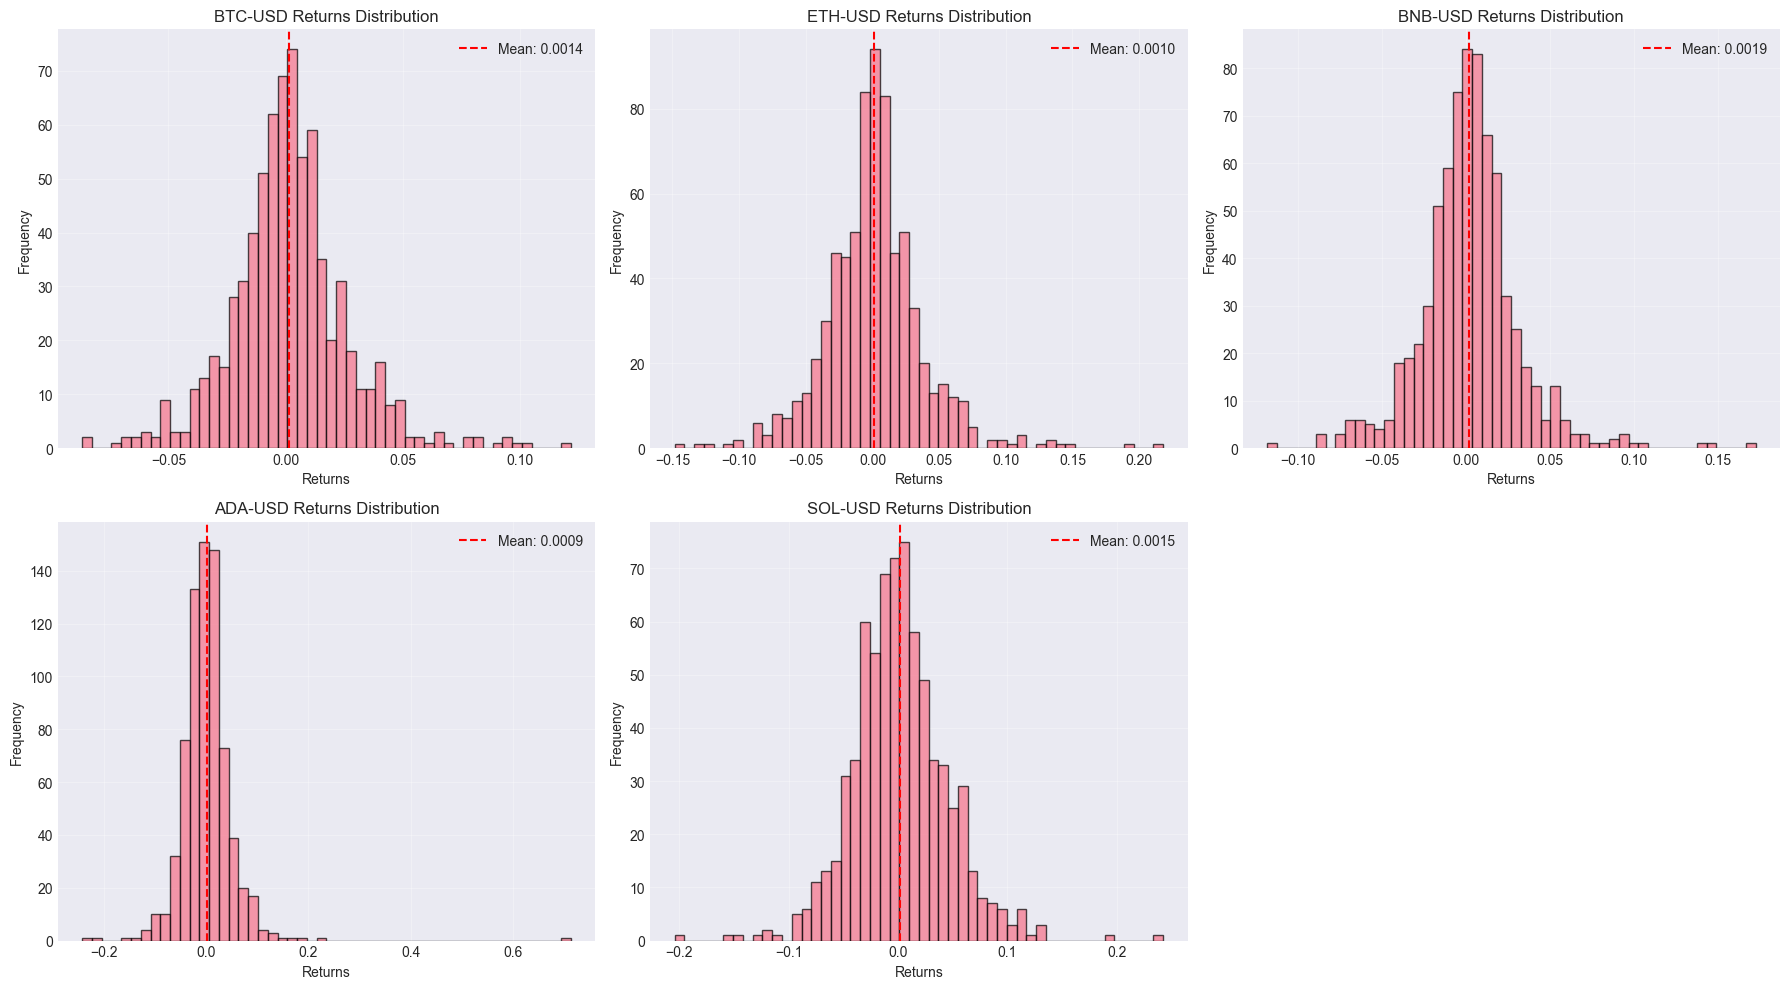

In [7]:
# Calculate returns for each cryptocurrency
returns_data = {}
for ticker, data in crypto_data.items():
    # Extract close prices and ensure it's a Series
    close_prices = data['Close']

    # Handle different data formats
    if isinstance(close_prices, pd.DataFrame):
        # If it's a DataFrame, take the first column
        close_prices = close_prices.iloc[:, 0]
    elif not isinstance(close_prices, pd.Series):
        # If it's not a Series, convert it
        close_prices = pd.Series(close_prices.flatten(), index=data.index)
    
    # Calculate returns
    returns_data[ticker] = calculate_returns(close_prices.values)

    # Debug info (can be removed later)
    print(f"{ticker}: Close prices shape: {close_prices.shape}, Returns shape: {returns_data[ticker].shape}")

# Create returns DataFrame
returns_df = pd.DataFrame(returns_data)

# Plot returns distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    if i < len(axes):
        axes[i].hist(returns_df[ticker].dropna(), bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{ticker} Returns Distribution')
        axes[i].set_xlabel('Returns')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)
        
        # Add vertical line at mean
        mean_return = returns_df[ticker].mean()
        axes[i].axvline(mean_return, color='red', linestyle='--', 
                       label=f'Mean: {mean_return:.4f}')
        axes[i].legend()

# Hide the last subplot if we have fewer than 6 cryptocurrencies
if len(tickers) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

BTC-USD:
  Original data length: 730
  Returns length: 729
  Volatility length: 700
ETH-USD:
  Original data length: 730
  Returns length: 729
  Volatility length: 700
BNB-USD:
  Original data length: 730
  Returns length: 729
  Volatility length: 700
ADA-USD:
  Original data length: 730
  Returns length: 729
  Volatility length: 700
SOL-USD:
  Original data length: 730
  Returns length: 729
  Volatility length: 700

volatility_df shape: (700, 5)
BTC-USD index length: 730
Expected volatility length: 700
Actual volatility length: 700
Index set successfully


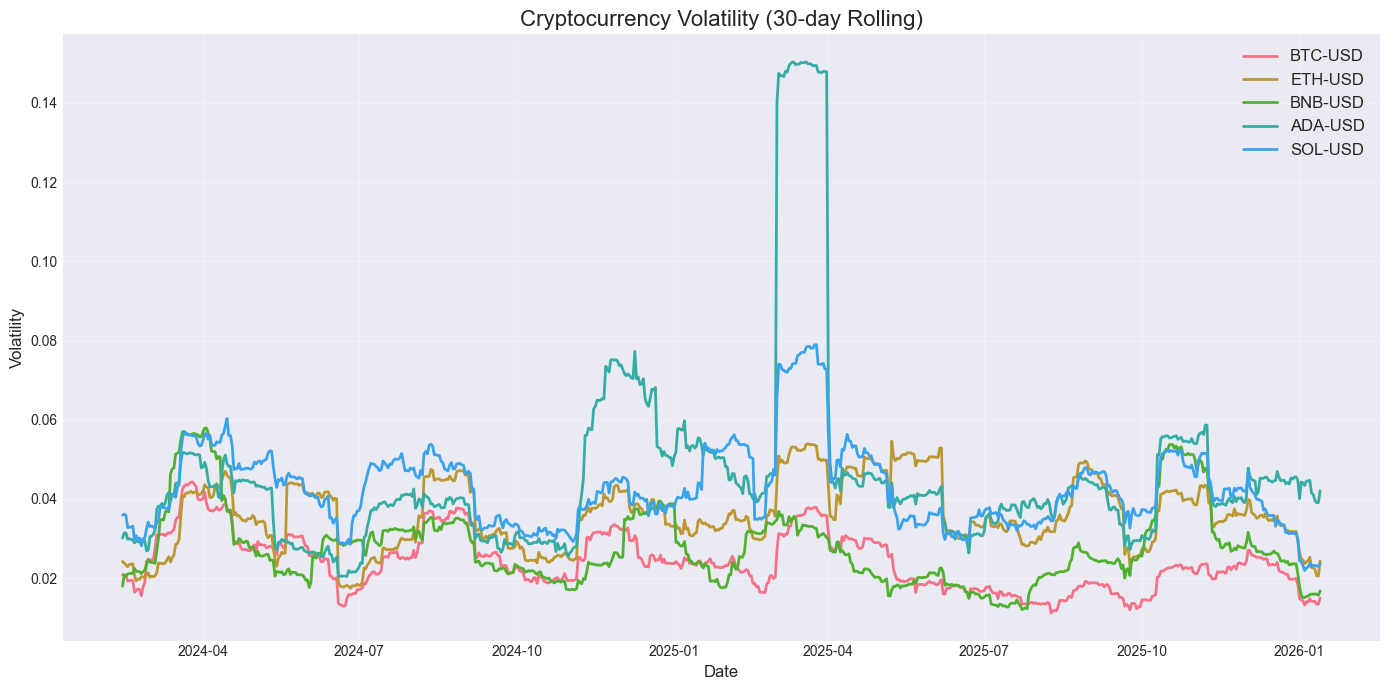

In [8]:
# Calculate and plot volatility
volatility_data = {}
for ticker, data in crypto_data.items():
    returns = calculate_returns(data['Close'].values)
    volatility = calculate_volatility(returns, window_size=30)
    volatility_data[ticker] = volatility
    
    # Debug info
    print(f"{ticker}:")
    print(f"  Original data length: {len(data)}")
    print(f"  Returns length: {len(returns)}")
    print(f"  Volatility length: {len(volatility)}")

# Create volatility DataFrame
volatility_df = pd.DataFrame(volatility_data)

# Debug info
print(f"\nvolatility_df shape: {volatility_df.shape}")
print(f"BTC-USD index length: {len(crypto_data['BTC-USD'].index)}")

# Calculate the correct index
window_size = 30
# Returns length = original length - 1
# Volatility length = returns length - window_size + 1 = original length - window_size
expected_volatility_length = len(crypto_data['BTC-USD']) - window_size
print(f"Expected volatility length: {expected_volatility_length}")
print(f"Actual volatility length: {len(volatility_df)}")

# Set the correct index
if len(volatility_df) == expected_volatility_length:
    # The index should start from the window_size position
    volatility_df.index = crypto_data['BTC-USD'].index[window_size:]
    print("Index set successfully")
else:
    print("Length mismatch, using alternative approach")
    # Use the actual length of volatility_df
    volatility_df.index = crypto_data['BTC-USD'].index[window_size:window_size + len(volatility_df)]

# Plot volatility
plt.figure(figsize=(14, 7))
for ticker in volatility_df.columns:
    plt.plot(volatility_df.index, volatility_df[ticker], label=ticker, linewidth=2)

plt.title('Cryptocurrency Volatility (30-day Rolling)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Correlation Analysis

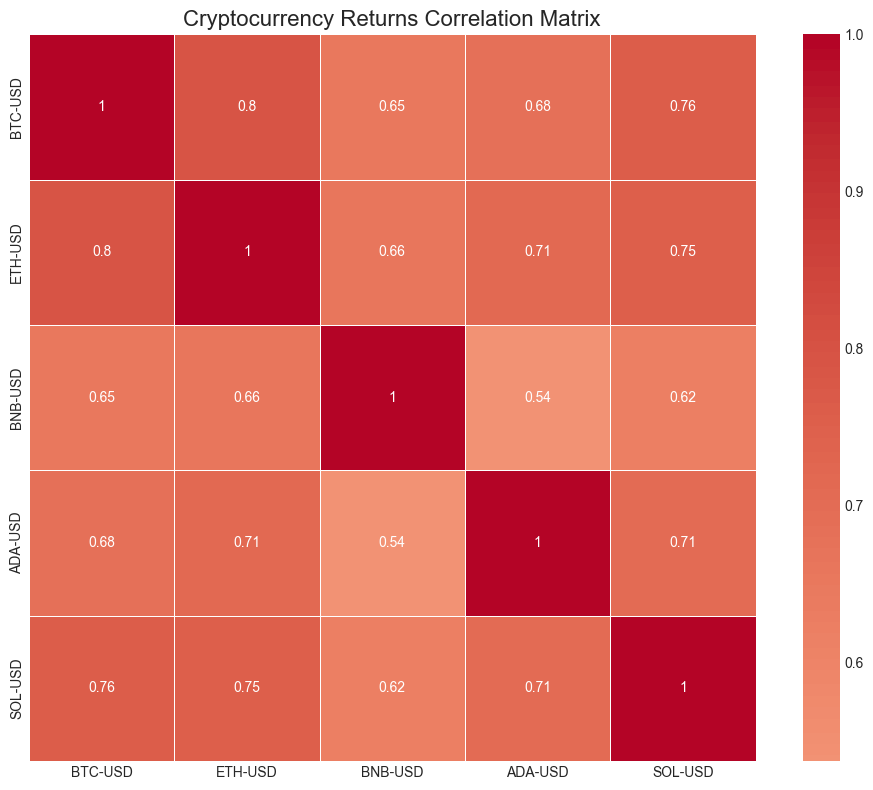

In [9]:
# Calculate correlation matrix
correlation_matrix = returns_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Cryptocurrency Returns Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

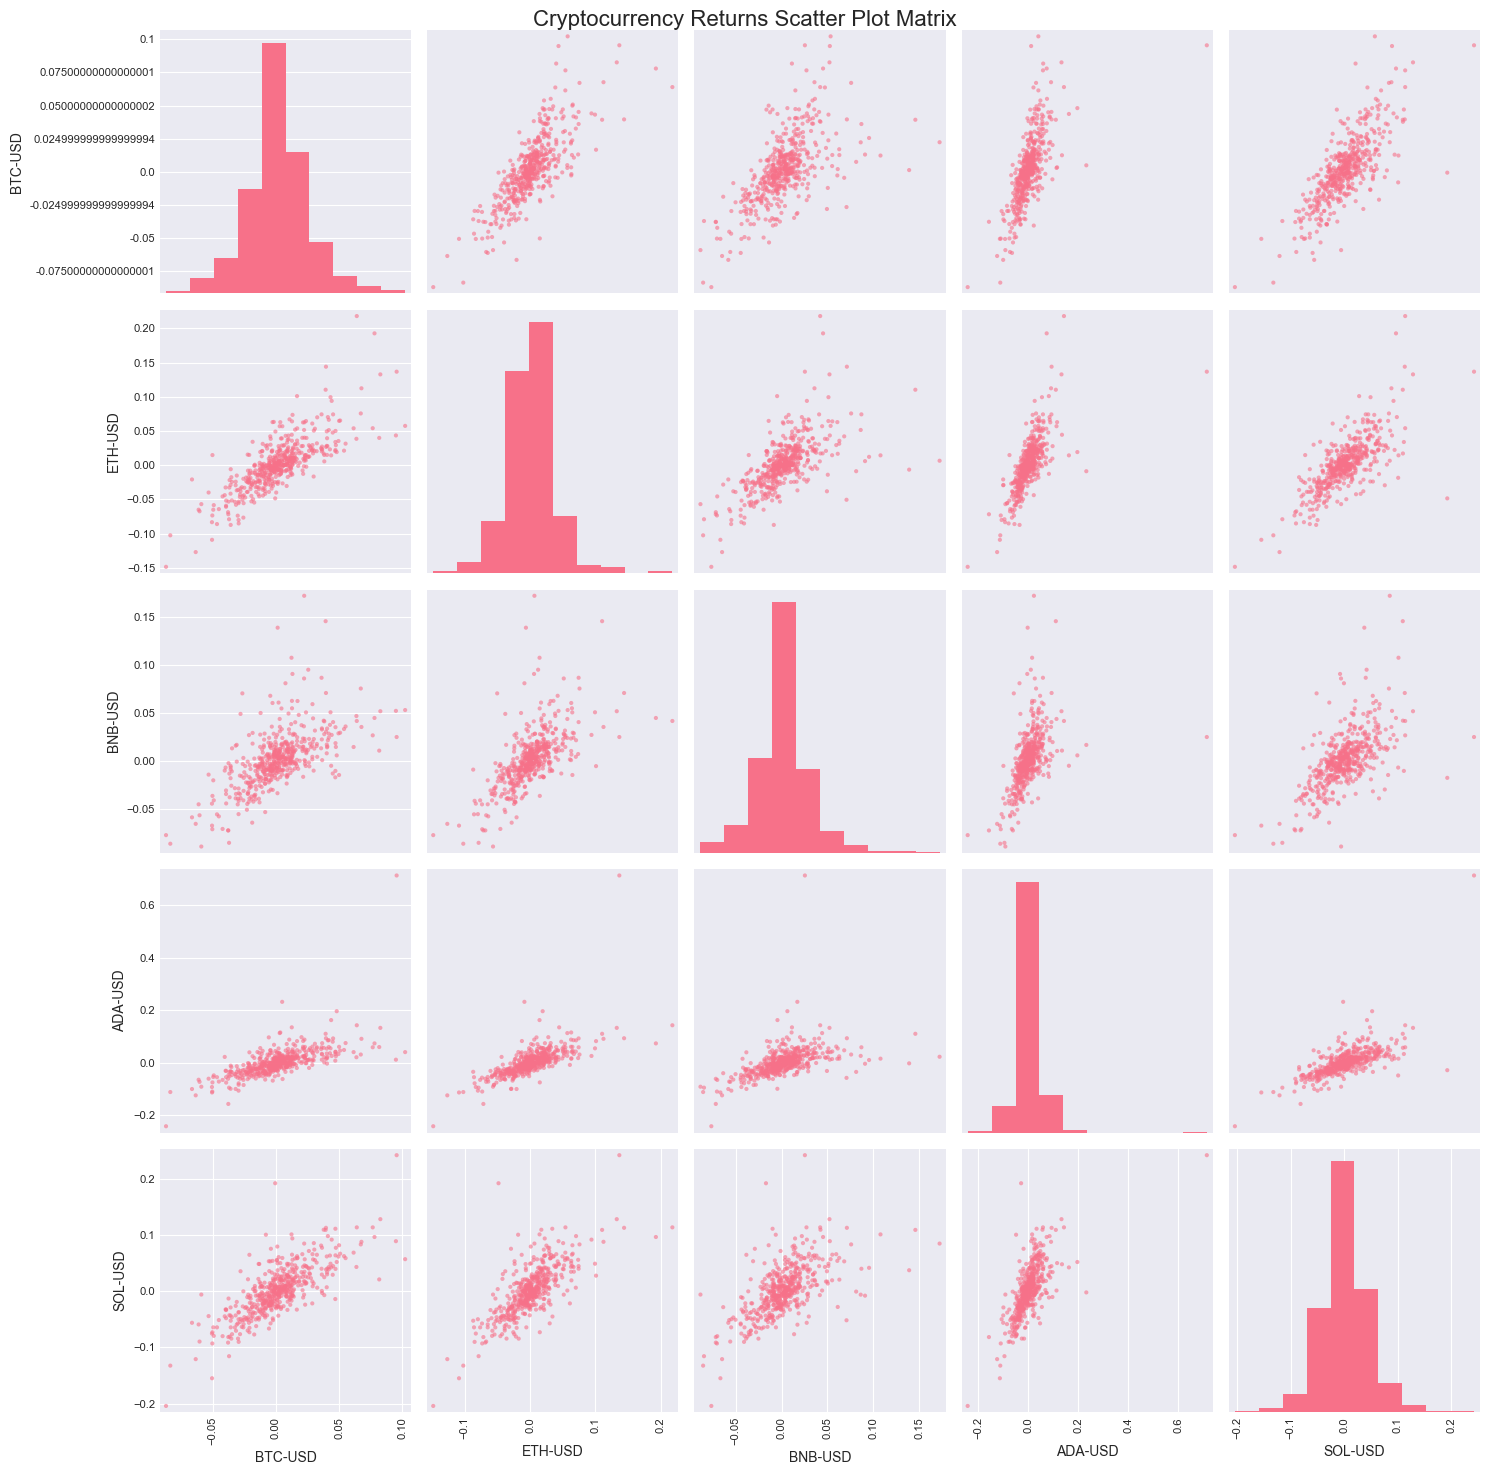

In [10]:
# Plot scatter plot matrix
from pandas.plotting import scatter_matrix

# Sample data for faster plotting
sampled_returns = returns_df.sample(n=min(500, len(returns_df)), random_state=42)

scatter_matrix(sampled_returns, figsize=(15, 15), diagonal='hist',
               alpha=0.6, grid=True)
plt.suptitle('Cryptocurrency Returns Scatter Plot Matrix', fontsize=16)
plt.tight_layout()
plt.show()

## 5. Volume Analysis

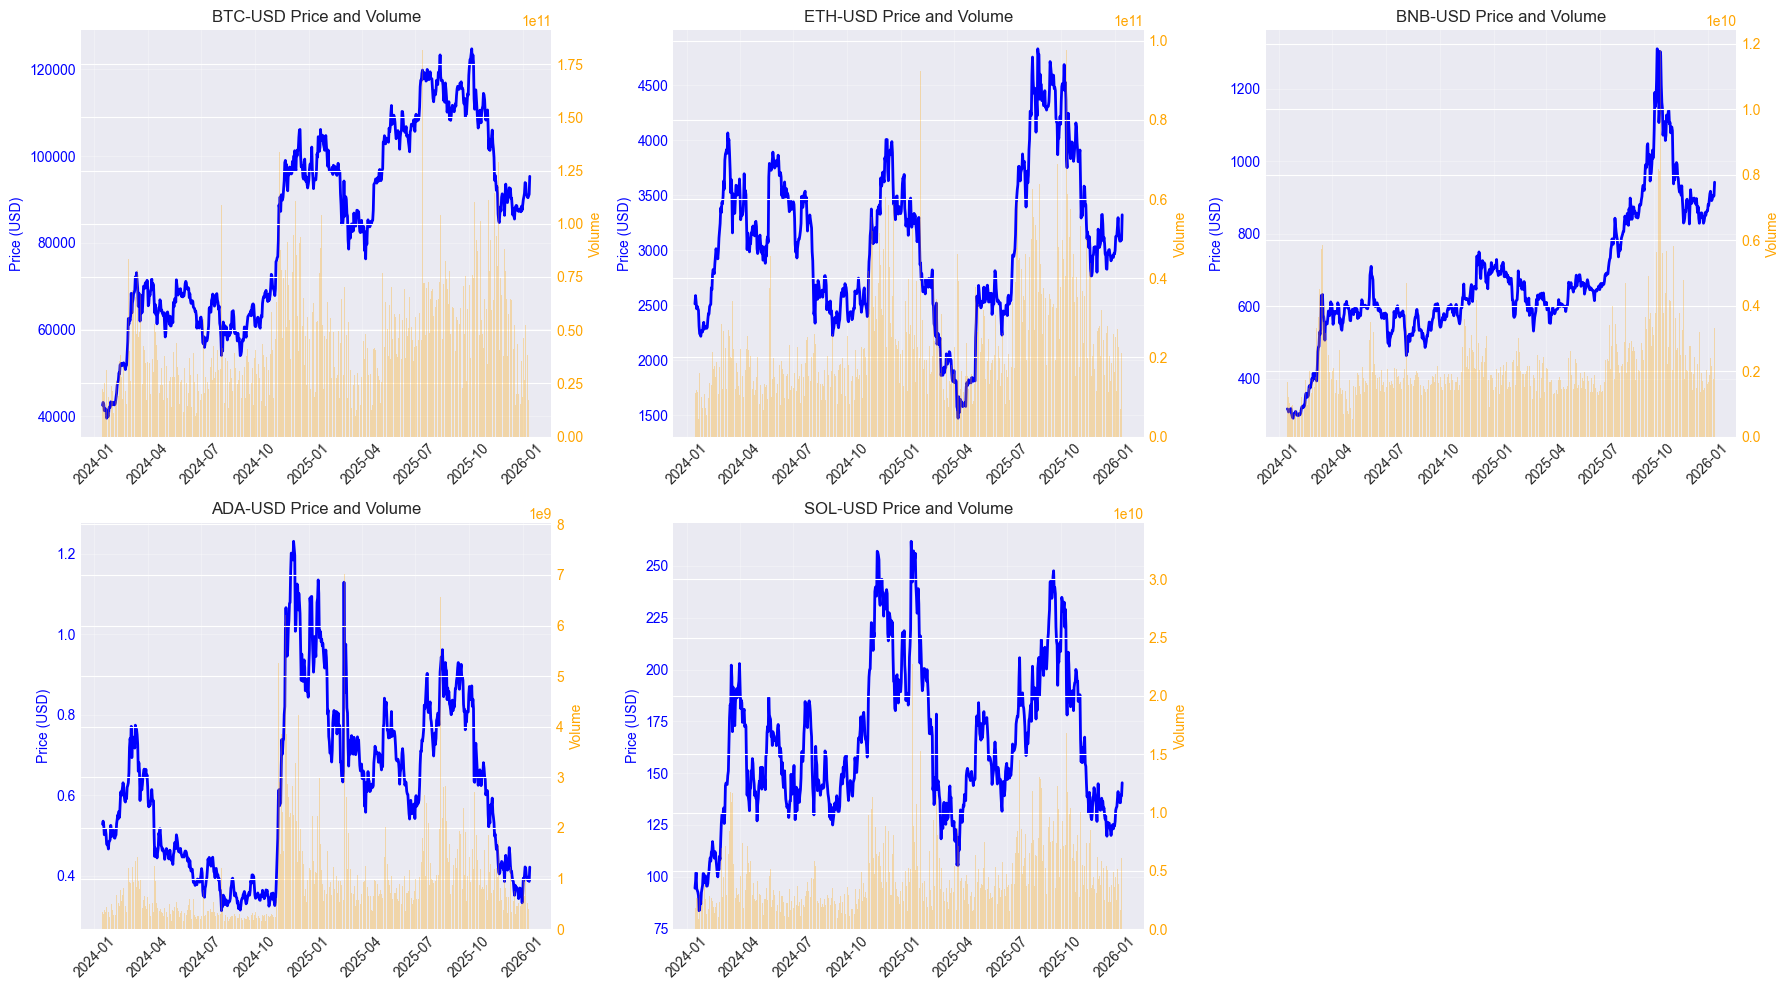

In [11]:
# Plot volume for top cryptocurrencies
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (ticker, data) in enumerate(crypto_data.items()):
    if i < len(axes):
        # Plot price on primary axis
        ax1 = axes[i]
        ax1.plot(data.index, data['Close'], color='blue', linewidth=2, label='Price')
        ax1.set_title(f'{ticker} Price and Volume')
        ax1.set_ylabel('Price (USD)', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.grid(True, alpha=0.3)
        
        # Plot volume on secondary axis
        ax2 = ax1.twinx()
        ax2.bar(data.index, data['Volume'], alpha=0.3, color='orange', label='Volume')
        ax2.set_ylabel('Volume', color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')
        
        # Format x-axis
        ax1.tick_params(axis='x', rotation=45)

# Hide the last subplot if we have fewer than 6 cryptocurrencies
if len(crypto_data) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

## 6. Seasonal and Pattern Analysis

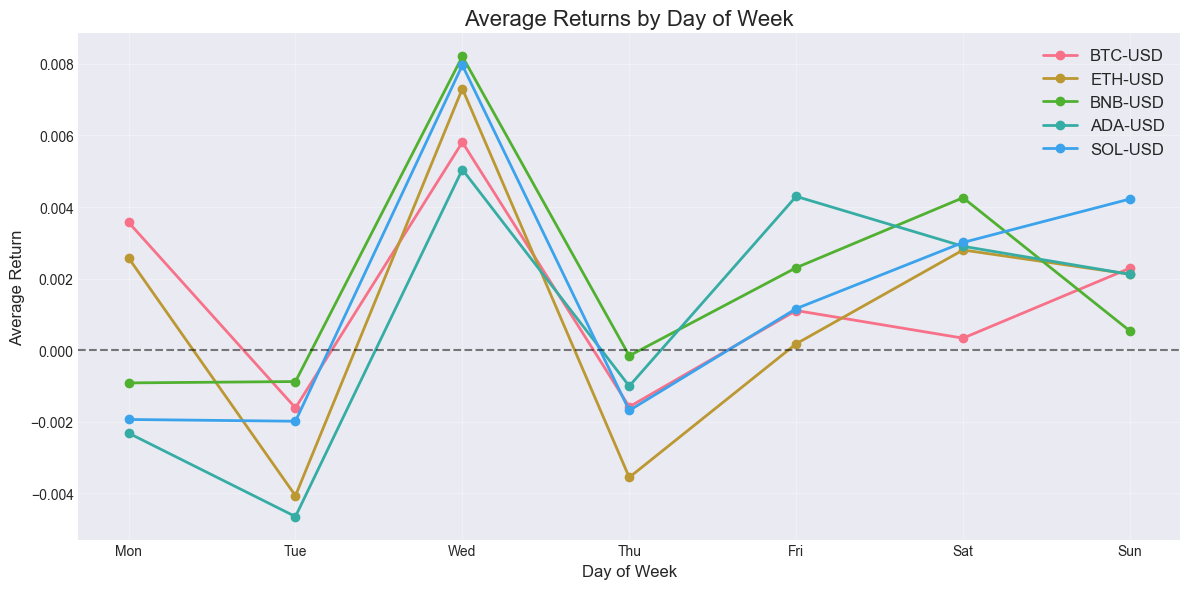

In [12]:
# Analyze day-of-week patterns
day_of_week_returns = {}
for ticker, data in crypto_data.items():
    returns = calculate_returns(data['Close'].values)
    df_temp = pd.DataFrame({'returns': returns, 'date': data.index[1:]})
    df_temp['day_of_week'] = df_temp['date'].dt.dayofweek
    day_of_week_returns[ticker] = df_temp.groupby('day_of_week')['returns'].mean()

# Create DataFrame for plotting
day_of_week_df = pd.DataFrame(day_of_week_returns)
day_of_week_df.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot day-of-week patterns
plt.figure(figsize=(12, 6))
for ticker in day_of_week_df.columns:
    plt.plot(day_of_week_df.index, day_of_week_df[ticker], marker='o', label=ticker, linewidth=2)

plt.title('Average Returns by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Return', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

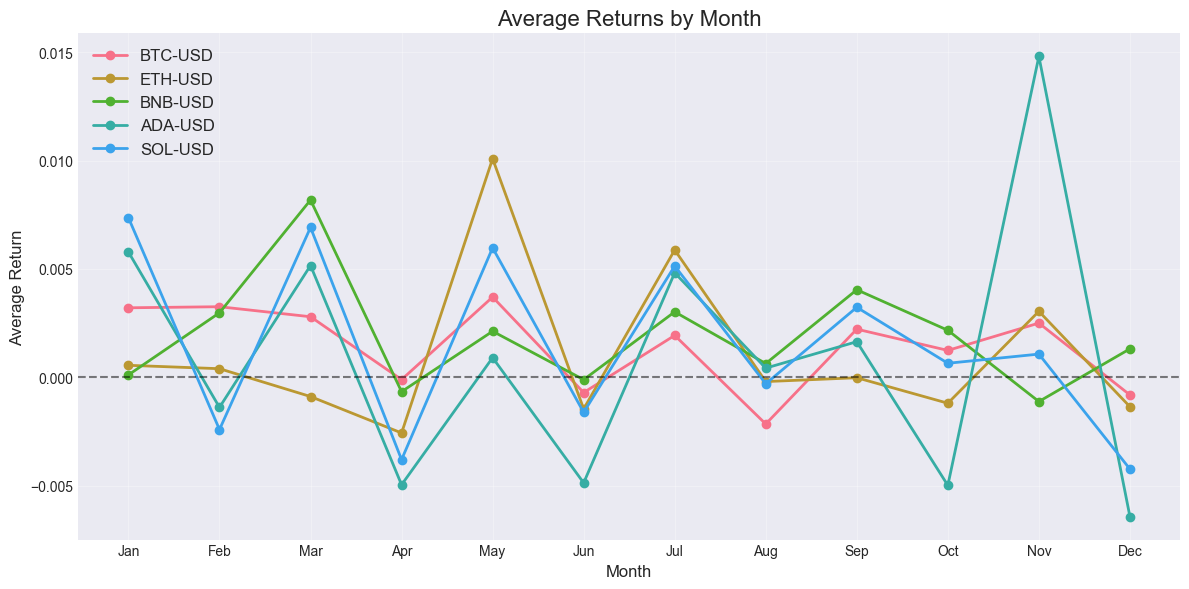

In [13]:
# Analyze monthly patterns
monthly_returns = {}
for ticker, data in crypto_data.items():
    returns = calculate_returns(data['Close'].values)
    df_temp = pd.DataFrame({'returns': returns, 'date': data.index[1:]})
    df_temp['month'] = df_temp['date'].dt.month
    monthly_returns[ticker] = df_temp.groupby('month')['returns'].mean()

# Create DataFrame for plotting
monthly_df = pd.DataFrame(monthly_returns)
monthly_df.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot monthly patterns
plt.figure(figsize=(12, 6))
for ticker in monthly_df.columns:
    plt.plot(monthly_df.index, monthly_df[ticker], marker='o', label=ticker, linewidth=2)

plt.title('Average Returns by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Return', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 7. Statistical Tests

In [14]:
# Perform Augmented Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

print("Augmented Dickey-Fuller Test Results:")
print("-" * 50)
for ticker, data in crypto_data.items():
    result = adfuller(data['Close'])
    print(f"\n{ticker}:")
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] < 0.05:
        print("Result: Reject null hypothesis - Series is stationary")
    else:
        print("Result: Fail to reject null hypothesis - Series is non-stationary")

Augmented Dickey-Fuller Test Results:
--------------------------------------------------

BTC-USD:
ADF Statistic: -1.9686
p-value: 0.3005
Critical Values:
	1%: -3.4394
	5%: -2.8655
	10%: -2.5689
Result: Fail to reject null hypothesis - Series is non-stationary

ETH-USD:
ADF Statistic: -2.2039
p-value: 0.2048
Critical Values:
	1%: -3.4394
	5%: -2.8655
	10%: -2.5689
Result: Fail to reject null hypothesis - Series is non-stationary

BNB-USD:
ADF Statistic: -1.6910
p-value: 0.4357
Critical Values:
	1%: -3.4395
	5%: -2.8656
	10%: -2.5689
Result: Fail to reject null hypothesis - Series is non-stationary

ADA-USD:
ADF Statistic: -2.0380
p-value: 0.2702
Critical Values:
	1%: -3.4394
	5%: -2.8655
	10%: -2.5689
Result: Fail to reject null hypothesis - Series is non-stationary

SOL-USD:
ADF Statistic: -3.0592
p-value: 0.0297
Critical Values:
	1%: -3.4394
	5%: -2.8655
	10%: -2.5689
Result: Reject null hypothesis - Series is stationary


In [15]:
# Calculate Hurst exponent to measure long-term memory
def hurst_exponent(ts):
    """Calculate the Hurst Exponent of the time series"""
    lags = range(2, 100)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    return poly[0] * 2.0

print("Hurst Exponent Results:")
print("-" * 30)
for ticker, data in crypto_data.items():
    hurst = hurst_exponent(data['Close'].values)
    print(f"{ticker}: {hurst:.4f}")
    
    if hurst < 0.5:
        print("  -> Mean-reverting series")
    elif hurst == 0.5:
        print("  -> Random walk")
    else:
        print("  -> Trending series")

Hurst Exponent Results:
------------------------------
BTC-USD: 1.0377
  -> Trending series
ETH-USD: 1.0753
  -> Trending series
BNB-USD: 0.9008
  -> Trending series
ADA-USD: 0.9922
  -> Trending series
SOL-USD: 0.8842
  -> Trending series


In [16]:
# Calculate maximum drawdown of a price series
def calculate_max_drawdown(ts):
    """Calculate the maximum drawdown of a price series"""
    ts = np.asarray(ts)
    cumulative_max = np.maximum.accumulate(ts)
    drawdowns = (ts - cumulative_max) / cumulative_max
    return drawdowns.min()

# Example usage
print("Maximum Drawdown Results:")
print("-" * 30)
for ticker, data in crypto_data.items():
    mdd = calculate_max_drawdown(data['Close'].values)
    print(f"{ticker}: {mdd:.4f}")

    if mdd < -0.2:
        print("  -> High risk drawdown")
    elif mdd < -0.1:
        print("  -> Moderate drawdown")
    else:
        print("  -> Low drawdown")


Maximum Drawdown Results:
------------------------------
BTC-USD: -0.3215
  -> High risk drawdown
ETH-USD: -0.6379
  -> High risk drawdown
BNB-USD: -0.3685
  -> High risk drawdown
ADA-USD: -0.7296
  -> High risk drawdown
SOL-USD: -0.5971
  -> High risk drawdown


## 8. Summary Statistics

In [17]:
# Create summary statistics table
summary_stats = pd.DataFrame()

for ticker, data in crypto_data.items():
    returns = calculate_returns(data['Close'].values)
    
    stats = {
        'Mean Return': returns.mean(),
        'Std Return': returns.std(),
        'Min Return': returns.min(),
        'Max Return': returns.max(),
        'Skewness': pd.Series(returns).skew(),
        'Kurtosis': pd.Series(returns).kurtosis(),
        'Sharpe Ratio': returns.mean() / returns.std() * np.sqrt(365),
        'Max Drawdown': calculate_max_drawdown(data['Close'].values),
        'Volatility (30d)': calculate_volatility(returns, 30).mean(),
        'Hurst Exponent': hurst_exponent(data['Close'].values)
    }
    
    summary_stats[ticker] = pd.Series(stats)

# Display summary statistics
pd.set_option('display.float_format', '{:.4f}'.format)
display(summary_stats.T)

def calculate_max_drawdown(prices):
    """Calculate maximum drawdown"""
    peak = np.maximum.accumulate(prices)
    drawdown = (prices - peak) / peak
    return drawdown.min()

,Mean Return,Std Return,Min Return,Max Return,Skewness,Kurtosis,Sharpe Ratio,Max Drawdown,Volatility (30d),Hurst Exponent
BTC-USD,0.0014,0.0248,-0.0868,0.1214,0.4457,2.4670,1.0881,-0.3215,0.0241,1.0377
ETH-USD,0.0010,0.0366,-0.1485,0.2180,0.6208,4.2382,0.5458,-0.6379,0.0359,1.0753
BNB-USD,0.0019,0.0289,-0.1186,0.1723,0.5498,4.1550,1.2615,-0.3685,0.0277,0.9008
ADA-USD,0.0009,0.0514,-0.2428,0.7133,3.6522,51.7611,0.3373,-0.7296,0.0458,0.9922
SOL-USD,0.0015,0.0435,-0.2043,0.2423,0.2767,2.5269,0.6730,-0.5971,0.0427,0.8842


## 9. Key Insights

Based on our exploration, we can observe:

1. **Price Trends**: Most cryptocurrencies show similar overall trends with periods of high volatility.
2. **Return Distributions**: Returns are typically leptokurtic (fat tails) and often skewed.
3. **Correlations**: Strong positive correlations between major cryptocurrencies, especially during market stress.
4. **Volatility Clustering**: Periods of high volatility tend to cluster together.
5. **Seasonal Patterns**: Some evidence of day-of-week and monthly effects, though not statistically significant.
6. **Non-Stationarity**: Price series are generally non-stationary, requiring differencing for modeling.
7. **Long-term Memory**: Hurst exponents suggest varying degrees of trend-reverting or trending behavior.

These insights will guide our feature engineering and model selection process.